In [12]:
all_d = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

## Adult

In [42]:
import pandas as pd
adv_df = pd.read_csv("adult/data/shadow_model_outputs_proba-new_test_set.csv")

In [50]:
adult_adv = keras.models.load_model('adult/models/adult_adv_0.72_test_r2.keras')

In [46]:
all_adult = []
for d in all_d:
    all_adult.append(adv_df[adv_df["y"]==d])

In [51]:
adult_maes = []

for adv_test in all_adult:
    adv_y_test = adv_test["y"]
    adv_X_test = adv_test.drop(columns=["y"])
    mae = keras.metrics.MeanAbsoluteError()
    m = mae(adv_y_test, adult_adv(adv_X_test)).numpy()
    adult_maes.append(m)

In [52]:
adult_maes

[0.19290127,
 0.04880801,
 0.11366033,
 0.11766518,
 0.09213549,
 0.02931243,
 0.03231824,
 0.14060241,
 0.24407482]

## UTKFace

In [1]:
import keras

adversary = keras.models.load_model('utkface/models/adv_v2_0.63_r2.keras')

2024-04-27 16:47:18.575258: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 16:47:18.580185: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 16:47:21.877127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import pandas as pd

all_adv_test = [pd.read_csv(f"utkface/data/shadow_model_outputs/{dist}/test.csv") for dist in all_d]

In [16]:
utk_maes = []

for adv_test, d in zip(all_adv_test, all_d):
    adv_y_test = adv_test["y"]
    adv_X_test = adv_test.drop(columns=["y"])
    mae = keras.metrics.MeanAbsoluteError()
    m = mae(adv_y_test, adversary(adv_X_test)).numpy()
    utk_maes.append(m)

In [17]:
utk_maes

[0.17484735,
 0.17600821,
 0.12236618,
 0.085059844,
 0.05526917,
 0.053429887,
 0.10544886,
 0.16678973,
 0.259519]

## CIFAR-10

In [20]:
adv_test_cifar = [pd.read_csv(f"cifar_new_new/data/shadow_model_outputs/{dist}/test.csv") for dist in all_d]

In [22]:
cifar_adv = keras.models.load_model('cifar/models/cifar-adv_0.62_test_r2.keras')

/informatik2/svs/home/stock/anaconda3/envs/pia-tf2/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [23]:
cifar_maes = []

for adv_test in adv_test_cifar:
    adv_y_test = adv_test["y"]
    adv_X_test = adv_test.drop(columns=["y"])
    mae = keras.metrics.MeanAbsoluteError()
    m = mae(adv_y_test, cifar_adv(adv_X_test)).numpy()
    cifar_maes.append(m)

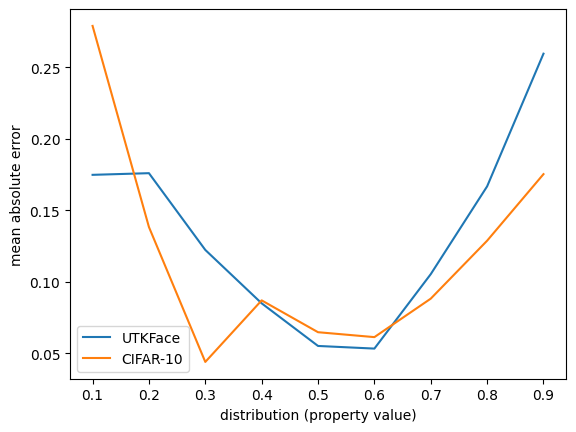

In [40]:
import matplotlib.pyplot as plt


plt.plot(all_d, utk_maes, label = "UTKFace") 
plt.plot(all_d, cifar_maes, label = "CIFAR-10") 
plt.legend() 
plt.xlabel("distribution (property value)")
plt.ylabel("mean absolute error")
plt.show()

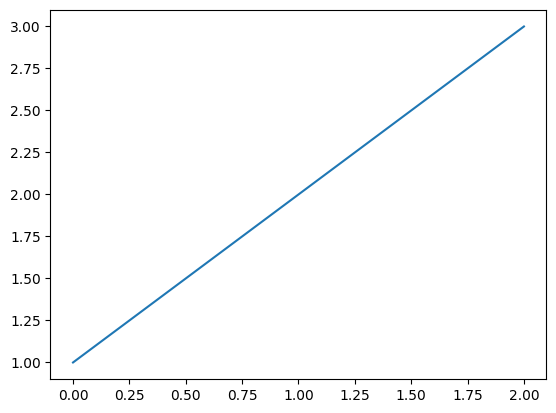

In [35]:
plt.plot([1, 2, 3])
plt.show()

In [32]:
cifar_maes

[0.2789116,
 0.13837264,
 0.044110894,
 0.087120555,
 0.064873174,
 0.061440688,
 0.08833109,
 0.12881975,
 0.17533214]

In [58]:
import pandas as pd

attack_eval = pd.DataFrame({"dist": all_d, "adult": adult_maes, "utk": utk_maes, "cifar": cifar_maes})

In [59]:
attack_eval.to_csv('attack_eval.csv', index=False)